In [1]:
import sys, os, pickle
sys.path.append('/scratch/oem214/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from wrappers import *
import matplotlib.pyplot as plt

In [2]:
i_seed = 19 #Cherry pick random seed that gives cleanest Stage 1 for illustration purposes
np.random.seed(i_seed)
task = Flip_Flop_Task(3, 0.05, input_magnitudes=None)
N_train = 20000
N_test = 1000
checkpoint_interval = 10
sigma = 0

data = task.gen_data(N_train, N_test)

n_in = task.n_in
n_hidden = 32
n_out = task.n_out
W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))

b_rec = np.zeros(n_hidden)
b_out = np.zeros(n_out)

alpha = 1
sigma = 0

rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
          activation=tanh,
          alpha=alpha,
          output=identity,
          loss=mean_squared_error)

learn_alg = RFLO(rnn, alpha=alpha, L1_reg=0.0001, L2_reg=0.0001)
optimizer = SGD_Momentum(lr=0.01, mu=0.6)

monitors = []

sim = Simulation(rnn)
sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
        sigma=sigma,
        monitors=monitors,
        verbose=True,
        report_accuracy=False,
        report_loss=True,
        checkpoint_interval=checkpoint_interval,
        checkpoint_optimizer=False)

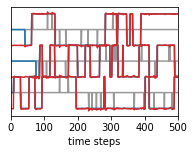

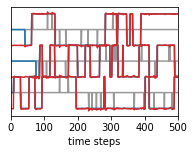

In [3]:
#Plot final checkpoint results
data = task.gen_data(0, 500)
plot_output_from_checkpoint(sim.checkpoints[sorted(sim.checkpoints.keys())[-1]], data)

In [4]:
file_name = 'Fig_1_2_RFLO_Anecdote_Result'

In [5]:
### --- SAVE RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'wb') as f:
    saved_run = {'sim': sim, 'task': task}
    pickle.dump(saved_run, f)

In [6]:
### --- OPEN RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'rb') as f:
    saved_run = pickle.load(f)
    sim = saved_run['sim']
    task =saved_run['task']

In [7]:
### -- Include geometry --- ###
topological_analysis(file_name, FP_find_FPs=True, FP_KE_criterion=0.00001, FP_N=1000,
                     compare_align_checkpoints=True, compare_aligned_graph=True,
                     compare_n_comp_window=1,
                     test_N=2000, test_save_data=True, compare_CKA=True,
                     compare_PC1=False, compare_PC2=True, compare_PC3=False,
                     results_subdir='Paper_Submission')

sending incremental file list

sent 3,494 bytes  received 32 bytes  7,052.00 bytes/sec
total size is 445,734  speedup is 126.41
rm: cannot remove '/scratch/oem214/learning-dynamics/results/Paper_Submission/compare_Fig_1_2_RFLO_Anecdote_Result/result_*': No such file or directory
sending incremental file list

sent 3,494 bytes  received 32 bytes  7,052.00 bytes/sec
total size is 445,734  speedup is 126.41


In [10]:
###Get job status
get_ipython().system('squeue -u oem214')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          26304115        cm  jupyter   oem214  R    1:27:20      1 cm038
